# Preprocessing

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.features import PCA

In [51]:
main_dir = "C:/Users/Vinicius/Desktop/DATA SCIENCE/BOOTCAMP/Projeto - IoT/cargas_eletricas"
df_original = pd.read_csv(f"{main_dir}/data/raw/db.csv")
df = df_original.copy()
df

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


## First Look and Data Visualization

In [52]:
df.isnull().sum().sum() # The dataframe does not have null values

0

In [53]:
df['Classes'].value_counts() # There are 7 classes of objects

3    30
2    22
1    16
5    16
4     8
6     4
7     4
Name: Classes, dtype: int64

In [54]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t0,24.0,23.0,-0.55,12.3,24.85,-0.35,0.45,4.9,0.1,14.3,...,22.05,25.85,9.25,19.6,25.85,14.7,11.55,14.35,22.7,-5.3
t1,24.0,23.0,-0.55,10.3,2.85,-0.35,0.45,5.9,0.1,11.3,...,13.05,2.85,10.25,5.6,2.85,4.7,5.55,4.35,-5.3,-6.3
t2,23.0,22.0,-0.55,15.3,5.85,0.65,1.45,6.9,-0.9,8.3,...,8.05,5.85,3.25,3.6,5.85,2.7,2.55,1.35,-0.3,-6.3
t3,25.0,21.0,3.45,15.3,-1.15,-0.35,0.45,4.9,0.1,8.3,...,3.05,7.85,5.25,4.6,7.85,-0.3,1.55,2.35,-5.3,-6.3
t4,24.0,21.0,13.45,16.3,2.85,0.65,1.45,3.9,0.1,8.3,...,1.05,3.85,3.25,2.6,3.85,0.7,0.55,-0.65,-1.3,-5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t196,0.0,0.0,0.45,1.3,0.85,0.65,0.45,-0.1,0.1,0.3,...,0.05,0.85,-0.75,0.6,0.85,0.7,-0.45,0.35,0.7,1.7
t197,1.0,-1.0,-0.55,-0.7,-0.15,-0.35,0.45,-1.1,0.1,1.3,...,0.05,0.85,1.25,0.6,0.85,-1.3,0.55,0.35,-2.3,-0.3
t198,0.0,1.0,0.45,1.3,0.85,-0.35,0.45,-1.1,1.1,-0.7,...,0.05,1.85,0.25,-2.4,1.85,-1.3,-0.45,0.35,0.7,-0.3
t199,0.0,0.0,-0.55,-0.7,-0.15,-0.35,-0.55,-1.1,0.1,0.3,...,0.05,-0.15,0.25,-1.4,-0.15,-0.3,0.55,-0.65,-1.3,-0.3


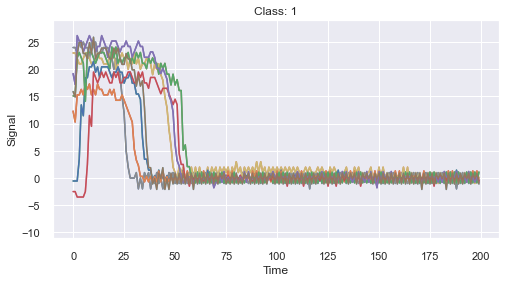

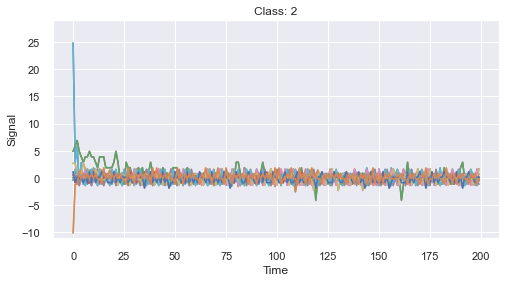

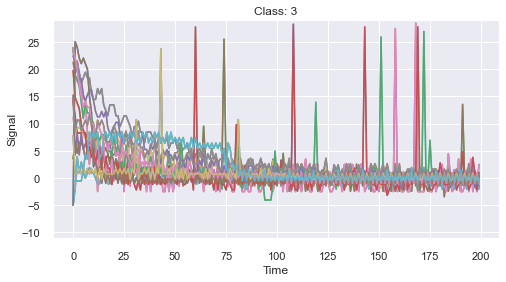

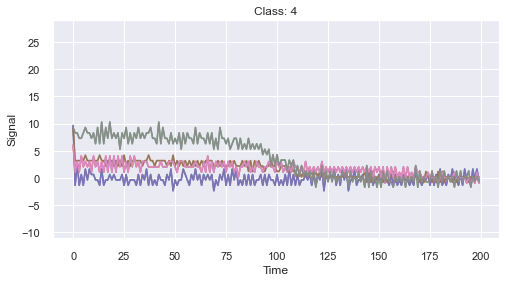

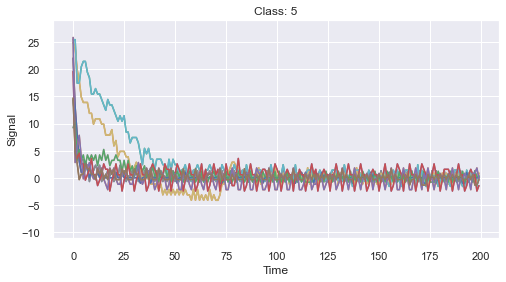

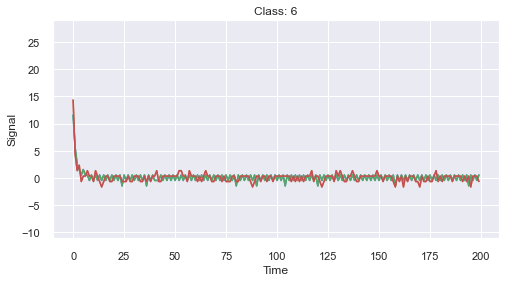

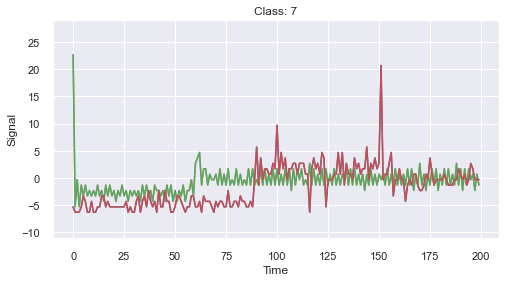

In [55]:
df_min = df.drop('Classes', axis=1).min().min()
df_max = df.drop('Classes', axis=1).max().max()

for i in np.arange(1,8):
    filter = df['Classes'] == i
    dff = df[filter].drop('Classes', axis=1).T
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(8,4))
    plt.ylim((int(df_min-1), int(df_max+1)))
    plt.title(f'Class: {i}')
    plt.xlabel('Time')
    plt.ylabel('Signal')
    for j in dff.columns:
        sns.lineplot(data=dff, x=np.arange(0,200), y=j)
    plt.show()

## Feature Selection